# BBM469 : Data Intensive Applications Lab. Assignment 2

#### Pre-Note
###### Graphs and Tables will be updated on new run.

### PROBLEM DEFINITION :
In this assignment, we were asked to understand the classification and clustering algorithms using python libraries and perform a basic experiment with appropriate datasets. We have also dealt with data manipulation and data normalization.

In [ ]:
# Installing necessary modules from the text file
!pip install -r requirements.txt

### Packages and First Look to the Dataset

In [ ]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

##### Util functions

In [ ]:
def display_confusion_matrix(confusion_matrix, message):
    # Heatmap display for confusion matrix
    labels = ["TN", "FP", "FN", "TP"]
    length = len(max(labels)) + 12
    labels = np.asarray(labels).reshape(2, 2)

    annots = [f"{str(label)}({str(value)})" for array in np.dstack((labels, confusion_matrix)) for (label, value) in
              array]
    annots = np.asarray(annots).reshape(2, 2).astype(str)
    plt.figure(figsize=(12, 8))
    plt.title("Confusion Matrix of {0}".format(message))
    sns.heatmap(confusion_matrix, annot=annots, fmt=f".{length}")
    plt.show()

In [ ]:
# Dimension-Reduction algorithm t-SNE for visualizing clusters

from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

def dimension_reduction_visualize(x, y, x_normalized, y_normalized, isClustered):
    reduced_X_tSNE = TSNE(n_components=2, random_state=0).fit_transform(x.values)
    reduced_X_tSNE_normalized = TSNE(n_components=2, random_state=0).fit_transform(x_normalized.values)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    f.suptitle("Clusters")

    #t-SNE scatter plot
    ax1.scatter(reduced_X_tSNE[:, 0], reduced_X_tSNE[:, 1], c=(y == 0), cmap="coolwarm", label="Non Diabetes",
                linewidths=3)
    ax1.scatter(reduced_X_tSNE[:, 0], reduced_X_tSNE[:, 1], c=(y == 1), cmap="coolwarm", label="Diabetes",
                linewidths=3)
    if isClustered:
        ax1.set_title("Original k-means clustered dataset (COD)", fontsize=14)
    else:
        ax1.set_title("Original dataset (OD)", fontsize=14)

    ax1.grid(False)

    ax2.scatter(reduced_X_tSNE_normalized[:, 0], reduced_X_tSNE_normalized[:, 1], c=(y_normalized == 0),
                cmap="coolwarm",
                label="Non Diabetes",
                linewidths=3)
    ax2.scatter(reduced_X_tSNE_normalized[:, 0], reduced_X_tSNE_normalized[:, 1], c=(y_normalized == 1),
                cmap="coolwarm",
                label="Diabetes",
                linewidths=3)

    if isClustered:
        ax2.set_title("Normalized k-means clustered dataset (CND)", fontsize=14)
    else:
        ax2.set_title("Normalized dataset (ND)", fontsize=14)

    ax2.grid(False)

    blue_legend = mpatches.Patch(color="#0A0AFF", label="Non Diabetes")
    red_legend = mpatches.Patch(color="#AF0000", label="Diabetes")
    ax1.legend(handles=[blue_legend, red_legend])
    ax2.legend(handles=[blue_legend, red_legend])

In [ ]:
# Reading dataset with special seperator
df = pd.read_csv("diabetes_data.csv", sep=";")

In [ ]:
# Statistical info about df
df.describe()

In [ ]:
# We must encode the 'gender' feature in later steps since it is not a numeric feature.
df.info()

In [ ]:
# Percentage of the classes
print("Non diabetes samples make up", round(df["class"].value_counts()[0] / len(df) * 100, 2), "% of the dataset.")
print("Diabetes samples make up", round(df["class"].value_counts()[1] / len(df) * 100, 2), "% of the dataset.")
# Plotting results
sns.countplot(x="class", data=df)

### Data Preprocessing

#### CREATING OD (original dataset)

In [ ]:
# Encoding 'gender' feature with LabelEncoder
enc = LabelEncoder()
df["gender"] = enc.fit_transform(df["gender"].astype(str))

df.head()

In [ ]:
# Correlation map for the features
df_sns = df.drop(labels="class", axis=1, inplace=False)
corr = df_sns.corr()
sns.heatmap(corr)

#### CREATING ND (normalized dataset)

In [ ]:
# Creating the normalized dataset with MinMaxScaler algorithm
scaler = MinMaxScaler()
normalized_df = df.copy()
normalized_df["age"] = scaler.fit_transform(normalized_df["age"].values.reshape(-1, 1))

normalized_df.head()

In [ ]:
normalized_non_diabetes = normalized_df[normalized_df["class"] == 0]
normalized_diabetes = normalized_df[normalized_df["class"] == 1]

# Shape of our normalized dataframe elements.
data = {"class": ["Non-Diabetes", "Diabetes"], "Shape": [normalized_non_diabetes.shape, normalized_diabetes.shape]}
info_df = pd.DataFrame(data)
info_df

#### CREATING COD (clustered original dataset)

In [ ]:
# Clustering part
from sklearn.cluster import KMeans

clustered_df = df.copy()
X_clustered = clustered_df.drop("class", axis=1)
y_clustered = clustered_df["class"]

# Clustering with KMeans algorithm according to desired cluster number
clustered_df["class"] = KMeans(n_clusters=clustered_df["class"].nunique(dropna=True), random_state=0).fit_predict(
    X_clustered)
clustered_df.head()

#### CREATING CND (clustered and normalized dataset)


In [ ]:
clustered_normalized_df = normalized_df.copy()
X_clustered_normalized = clustered_normalized_df.drop("class", axis=1)
y_clustered_normalized = clustered_normalized_df["class"]

clustered_normalized_df["class"] = KMeans(n_clusters=clustered_normalized_df["class"].nunique(dropna=True),
                                          random_state=0).fit_predict(X_clustered_normalized)
clustered_normalized_df.head()

In [ ]:
# Following schemes are meaningless since we have no non-binary values.
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].scatter(df.iloc[:, 0], df.iloc[:, 3])
axes[0, 0].set_title("Original data")
axes[0, 1].scatter(normalized_df.iloc[:, 0], normalized_df.iloc[:, 3])
axes[0, 1].set_title("Normalized data")
axes[1, 0].scatter(clustered_df.iloc[:, 0], clustered_df.iloc[:, 3])
axes[1, 0].set_title("Clustered data")
axes[1, 1].scatter(clustered_normalized_df.iloc[:, 0], clustered_normalized_df.iloc[:, 3])
axes[1, 1].set_title("Clustered normalized data")
plt.show()

##### Dimension Reduction

In [ ]:
# Dimension-Reduction algorithm t-SNE for visualizing clusters
x_od = df.drop("class", axis=1)
y_od = df["class"]
x_nd = normalized_df.drop("class", axis=1)
y_nd = normalized_df["class"]

x_cod = clustered_df.drop("class", axis=1)
y_cod = clustered_df["class"]
x_cnd = clustered_normalized_df.drop("class", axis=1)
y_cnd = clustered_normalized_df["class"]
dimension_reduction_visualize(x_od, y_od, x_nd, y_nd, False)
dimension_reduction_visualize(x_cod, y_cod, x_cnd, y_cnd, True)


In [ ]:
# Data Partitioning-Splitting
from sklearn.model_selection import train_test_split

# OD
x_train_df, x_test_df, Y_train_df, Y_test_df = train_test_split(df.loc[:, df.columns != 'class'], df.loc[:, ['class']],
                                                                test_size=0.2, random_state=1)
# COD
x_train_clustered_df, x_test_clustered_df, Y_train_clustered_df, Y_test_clustered_df = train_test_split(
    clustered_df.loc[:, clustered_df.columns != 'class'], clustered_df.loc[:, ['class']], test_size=0.2, random_state=1)

# ND
x_train_normalized_df, x_test_normalized_df, Y_train_normalized_df, Y_test_normalized_df = train_test_split(
    normalized_df.loc[:, normalized_df.columns != 'class'], normalized_df.loc[:, ['class']], test_size=0.2,
    random_state=1)

# CND
x_train_clustered_normalized_df, x_test_clustered_normalized_df, Y_train_clustered_normalized_df, Y_test_clustered_normalized_df = train_test_split(
    clustered_normalized_df.loc[:, clustered_normalized_df.columns != 'class'],
    clustered_normalized_df.loc[:, ['class']], test_size=0.2, random_state=1)

#### Model Training-Optimizing and Evaluation


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# K-Nearest Neighbour algorithm for classifying task
knn = KNeighborsClassifier()
normalized_knn = KNeighborsClassifier()
clustered_knn = KNeighborsClassifier()
clustered_normalized_knn = KNeighborsClassifier()

In [ ]:
# Using GridSearchCV algorithm for optimizing our classifier objects
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Defining parameter range
k_range = list(range(3, 31, 2))
param_grid = dict(n_neighbors=k_range)

def optimized_prediction(knn, x_train, y_train, x_test, y_test, isNormalized, isClustered, message):

    grid_list = []
    score_list = []

    for i in range(2, 11):
        kf = KFold(n_splits=i)
        grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy', return_train_score=True)
        grid_search.fit(x_train, np.array(y_train).ravel())
        grid_list.append(grid_search)
        score_list.append(grid_search.best_score_)

    print("Best k value for CV : {0} - Score : {1}".format(score_list.index(max(score_list))+2, max(score_list)))
    print(score_list)
    grid_search = grid_list.pop(score_list.index(max(score_list)))

    print("Best k value for KNN: " + str(grid_search.best_params_))

    plt.plot(list(range(2,11)), score_list)
    plt.title("K-Fold Scores")
    plt.xlabel("k value")
    plt.ylabel("Score")

    accuracy = grid_search.best_score_ * 100
    if isNormalized:
        if isClustered:
            print("Accuracy for our clustered normalized training dataset with tuning is : {:.2f}%".format(accuracy))
        else:
            print("Accuracy for our normalized training dataset with tuning is : {:.2f}%".format(accuracy))
    else:
        if isClustered:
            print("Accuracy for our clustered original training dataset with tuning is : {:.2f}%".format(accuracy))
        else:
            print("Accuracy for our original training dataset with tuning is : {:.2f}%".format(accuracy))

    knn = grid_search.best_estimator_

    knn.fit(x_train, np.array(y_train).ravel())

    y_test_hat = knn.predict(x_test)

    test_accuracy = accuracy_score(y_test, y_test_hat) * 100

    if isNormalized:
        if isClustered:
            print(
                "Accuracy for our clustered normalized testing dataset with tuning is : {:.2f}%".format(test_accuracy))
        else:
            print("Accuracy for our normalized testing dataset with tuning is : {:.2f}%".format(test_accuracy))
    else:
        if isClustered:
            print("Accuracy for our clustered original testing dataset with tuning is : {:.2f}%".format(test_accuracy))
        else:
            print("Accuracy for our original testing dataset with tuning is : {:.2f}%".format(test_accuracy))
    print("Precision score: {:.2f}%".format(precision_score(y_test, y_test_hat)* 100))
    print("Recall score: {:.2f}%".format(recall_score(y_test, y_test_hat)* 100))
    display_confusion_matrix(confusion_matrix(y_test, y_test_hat), message=message)

In [ ]:
# PREDICTION WITH ORIGINAL DATASET STEP

# Prediction for OD
optimized_prediction(knn, x_train_df, Y_train_df, x_test_df, Y_test_df, isNormalized=False, isClustered=False,
                     message="OD")
# Prediction for ND
optimized_prediction(normalized_knn, x_train_normalized_df, Y_train_normalized_df, x_test_normalized_df,
                     Y_test_normalized_df, isNormalized=True, isClustered=False, message="ND")

In [ ]:
# PREDICTION WITH CLUSTERED DATASET STEP

# Prediction for COD
optimized_prediction(clustered_knn, x_train_clustered_df, Y_train_clustered_df, x_test_clustered_df,
                     Y_test_clustered_df, isNormalized=False, isClustered=True, message="COD")
# Prediction for CND
optimized_prediction(clustered_normalized_knn, x_train_clustered_normalized_df, Y_train_clustered_normalized_df,
                     x_test_clustered_normalized_df, Y_test_clustered_normalized_df, isNormalized=True,
                     isClustered=True, message="CND")

#### Commenting about the models were made in detail in the report.

<AxesSubplot:>

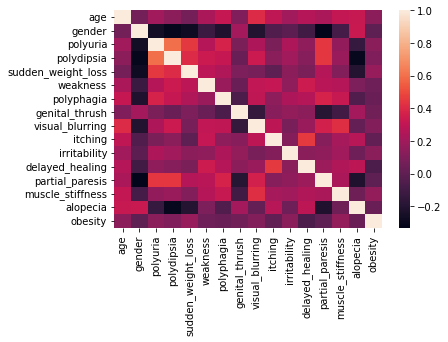

In [149]:
# Correlation map for the features
df_sns = df.drop(labels="class", axis=1, inplace=False)
corr = df_sns.corr()
sns.heatmap(corr)

#### CREATING ND (normalized dataset)

In [150]:
# Creating the normalized dataset with MinMaxScaler algorithm
scaler = MinMaxScaler()
normalized_df = df.copy()
normalized_df["age"] = scaler.fit_transform(normalized_df["age"].values.reshape(-1, 1))

normalized_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [151]:
normalized_non_diabetes = normalized_df[normalized_df["class"] == 0]
normalized_diabetes = normalized_df[normalized_df["class"] == 1]

# Shape of our normalized dataframe elements.
data = {"class": ["Non-Diabetes", "Diabetes"], "Shape": [normalized_non_diabetes.shape, normalized_diabetes.shape]}
info_df = pd.DataFrame(data)
info_df

,class,Shape
0,Non-Diabetes,"(200, 17)"
1,Diabetes,"(320, 17)"


#### CREATING COD (clustered original dataset)

In [152]:
# Clustering part
from sklearn.cluster import KMeans

clustered_df = df.copy()
X_clustered = clustered_df.drop("class", axis=1)
y_clustered = clustered_df["class"]

# Clustering with KMeans algorithm according to desired cluster number
clustered_df["class"] = KMeans(n_clusters=clustered_df["class"].nunique(dropna=True), random_state=0).fit_predict(
    X_clustered)
clustered_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0


#### CREATING CND (clustered and normalized dataset)


In [153]:
clustered_normalized_df = normalized_df.copy()
X_clustered_normalized = clustered_normalized_df.drop("class", axis=1)
y_clustered_normalized = clustered_normalized_df["class"]

clustered_normalized_df["class"] = KMeans(n_clusters=clustered_normalized_df["class"].nunique(dropna=True),
                                          random_state=0).fit_predict(X_clustered_normalized)
clustered_normalized_df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


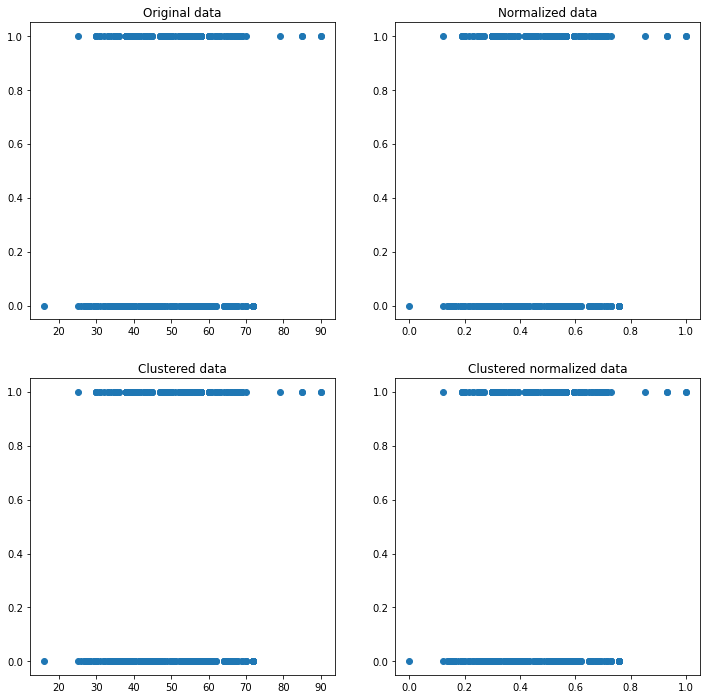

In [154]:
# Following schemes are meaningless since we have no non-binary values.
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].scatter(df.iloc[:, 0], df.iloc[:, 3])
axes[0, 0].set_title("Original data")
axes[0, 1].scatter(normalized_df.iloc[:, 0], normalized_df.iloc[:, 3])
axes[0, 1].set_title("Normalized data")
axes[1, 0].scatter(clustered_df.iloc[:, 0], clustered_df.iloc[:, 3])
axes[1, 0].set_title("Clustered data")
axes[1, 1].scatter(clustered_normalized_df.iloc[:, 0], clustered_normalized_df.iloc[:, 3])
axes[1, 1].set_title("Clustered normalized data")
plt.show()

##### Dimension Reduction

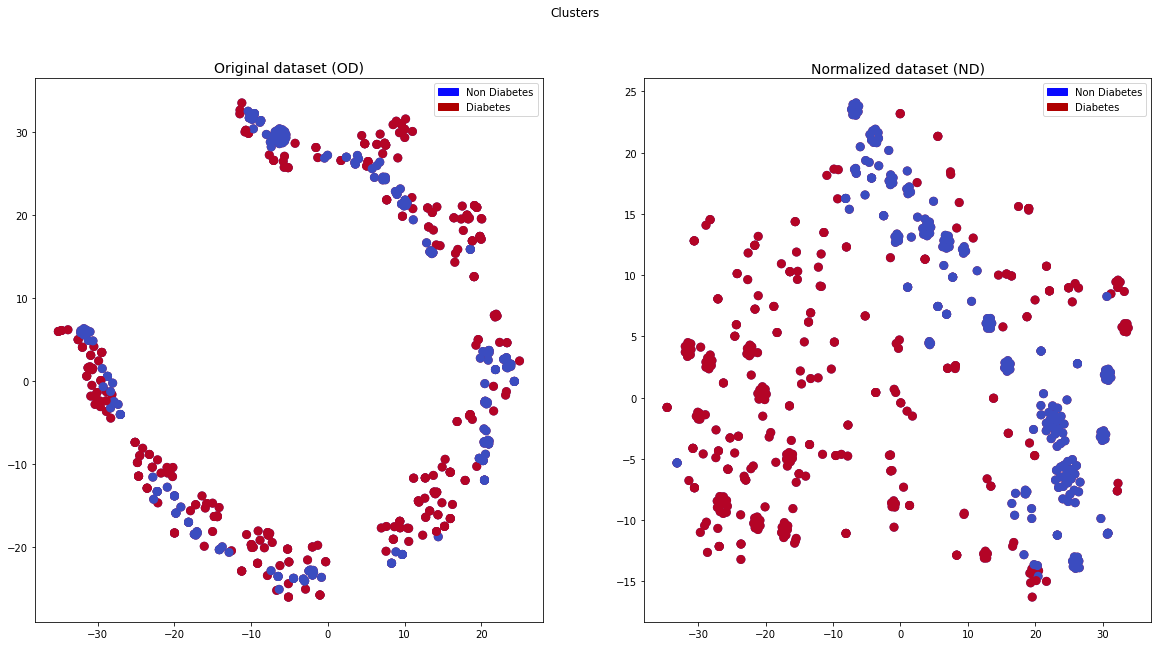

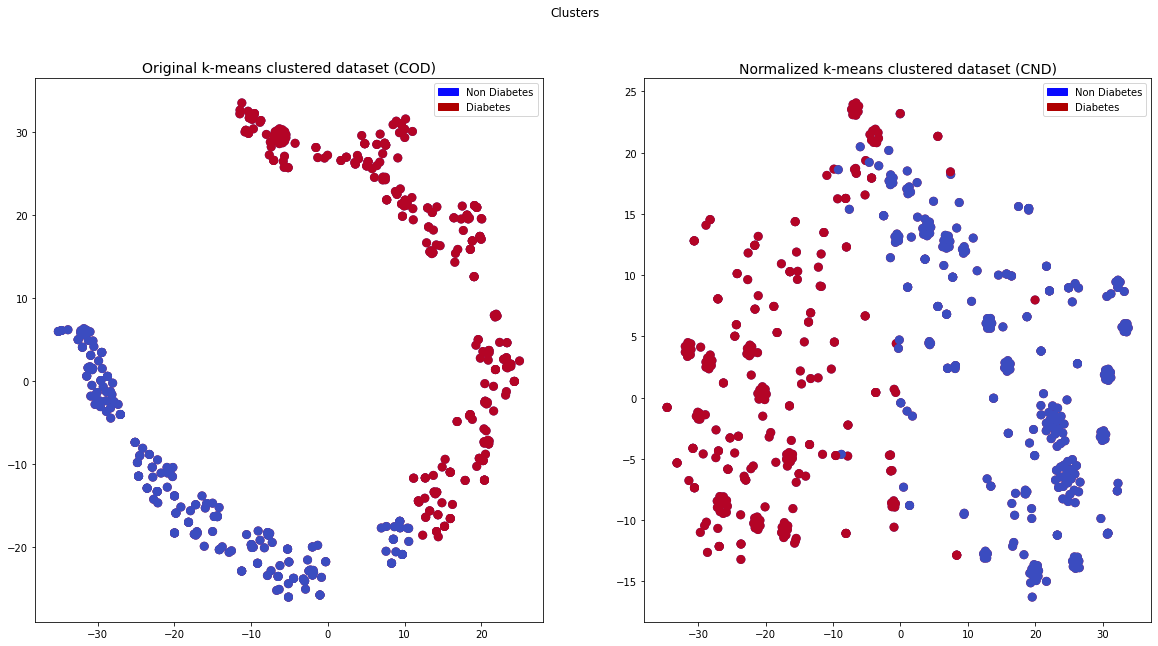

In [155]:
# Dimension-Reduction algorithm t-SNE for visualizing clusters
x_od = df.drop("class", axis=1)
y_od = df["class"]
x_nd = normalized_df.drop("class", axis=1)
y_nd = normalized_df["class"]

x_cod = clustered_df.drop("class", axis=1)
y_cod = clustered_df["class"]
x_cnd = clustered_normalized_df.drop("class", axis=1)
y_cnd = clustered_normalized_df["class"]
dimension_reduction_visualize(x_od, y_od, x_nd, y_nd, False)
dimension_reduction_visualize(x_cod, y_cod, x_cnd, y_cnd, True)


In [156]:
# Data Partitioning-Splitting
from sklearn.model_selection import train_test_split

# OD
x_train_df, x_test_df, Y_train_df, Y_test_df = train_test_split(df.loc[:, df.columns != 'class'], df.loc[:, ['class']],
                                                                test_size=0.2, random_state=1)
# COD
x_train_clustered_df, x_test_clustered_df, Y_train_clustered_df, Y_test_clustered_df = train_test_split(
    clustered_df.loc[:, clustered_df.columns != 'class'], clustered_df.loc[:, ['class']], test_size=0.2, random_state=1)

# ND
x_train_normalized_df, x_test_normalized_df, Y_train_normalized_df, Y_test_normalized_df = train_test_split(
    normalized_df.loc[:, normalized_df.columns != 'class'], normalized_df.loc[:, ['class']], test_size=0.2,
    random_state=1)

# CND
x_train_clustered_normalized_df, x_test_clustered_normalized_df, Y_train_clustered_normalized_df, Y_test_clustered_normalized_df = train_test_split(
    clustered_normalized_df.loc[:, clustered_normalized_df.columns != 'class'],
    clustered_normalized_df.loc[:, ['class']], test_size=0.2, random_state=1)

#### Model Training-Optimizing and Evaluation


In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# K-Nearest Neighbour algorithm for classifying task
knn = KNeighborsClassifier()
normalized_knn = KNeighborsClassifier()
clustered_knn = KNeighborsClassifier()
clustered_normalized_knn = KNeighborsClassifier()

In [158]:
# Using GridSearchCV algorithm for optimizing our classifier objects
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Defining parameter range
k_range = list(range(3, 31, 2))
param_grid = dict(n_neighbors=k_range)

def optimized_prediction(knn, x_train, y_train, x_test, y_test, isNormalized, isClustered, message):

    grid_list = []
    score_list = []

    for i in range(2, 11):
        kf = KFold(n_splits=i)
        grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy', return_train_score=True)
        grid_search.fit(x_train, np.array(y_train).ravel())
        grid_list.append(grid_search)
        score_list.append(grid_search.best_score_)

    print("Best k value for CV : {0} - Score : {1}".format(score_list.index(max(score_list))+2, max(score_list)))
    print(score_list)
    grid_search = grid_list.pop(score_list.index(max(score_list)))

    print("Best k value for KNN: " + str(grid_search.best_params_))

    plt.plot(list(range(2,11)), score_list)
    plt.title("K-Fold Scores")
    plt.xlabel("k value")
    plt.ylabel("Score")

    accuracy = grid_search.best_score_ * 100
    if isNormalized:
        if isClustered:
            print("Accuracy for our clustered normalized training dataset with tuning is : {:.2f}%".format(accuracy))
        else:
            print("Accuracy for our normalized training dataset with tuning is : {:.2f}%".format(accuracy))
    else:
        if isClustered:
            print("Accuracy for our clustered original training dataset with tuning is : {:.2f}%".format(accuracy))
        else:
            print("Accuracy for our original training dataset with tuning is : {:.2f}%".format(accuracy))

    knn = grid_search.best_estimator_

    knn.fit(x_train, np.array(y_train).ravel())

    y_test_hat = knn.predict(x_test)

    test_accuracy = accuracy_score(y_test, y_test_hat) * 100

    if isNormalized:
        if isClustered:
            print(
                "Accuracy for our clustered normalized testing dataset with tuning is : {:.2f}%".format(test_accuracy))
        else:
            print("Accuracy for our normalized testing dataset with tuning is : {:.2f}%".format(test_accuracy))
    else:
        if isClustered:
            print("Accuracy for our clustered original testing dataset with tuning is : {:.2f}%".format(test_accuracy))
        else:
            print("Accuracy for our original testing dataset with tuning is : {:.2f}%".format(test_accuracy))
    print("Precision score: {:.2f}%".format(precision_score(y_test, y_test_hat)* 100))
    print("Recall score: {:.2f}%".format(recall_score(y_test, y_test_hat)* 100))
    display_confusion_matrix(confusion_matrix(y_test, y_test_hat), message=message)

Best k value for CV : 9 - Score : 0.9108335902970501
[0.8317307692307692, 0.8652556215896848, 0.8701923076923077, 0.8772518646012621, 0.8869220151828846, 0.8989507667473768, 0.8966346153846153, 0.9108335902970501, 0.9013356562137049]
Best k value for KNN: {'n_neighbors': 3}
Accuracy for our original training dataset with tuning is : 91.08%
Accuracy for our original testing dataset with tuning is : 86.54%
Precision score: 91.94%
Recall score: 86.36%


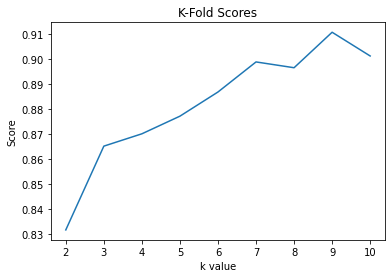

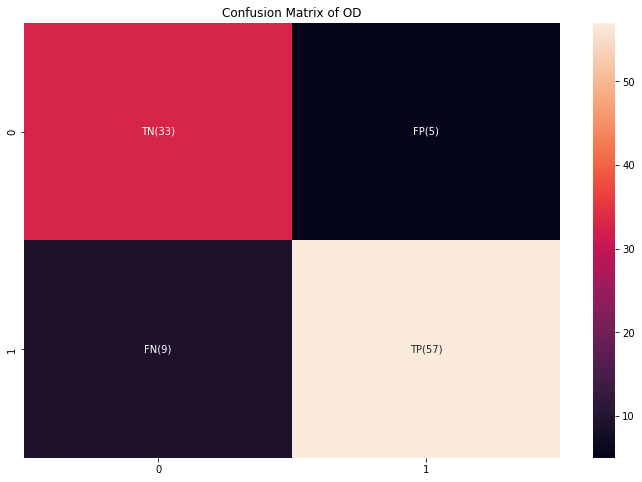

Best k value for CV : 9 - Score : 0.9518449994860726
[0.9158653846153846, 0.9277968929204462, 0.9254807692307692, 0.9253872633390706, 0.9398895790200137, 0.9494753833736885, 0.9447115384615384, 0.9518449994860726, 0.944541231126597]
Best k value for KNN: {'n_neighbors': 3}
Accuracy for our normalized training dataset with tuning is : 95.18%
Accuracy for our normalized testing dataset with tuning is : 91.35%
Precision score: 96.72%
Recall score: 89.39%


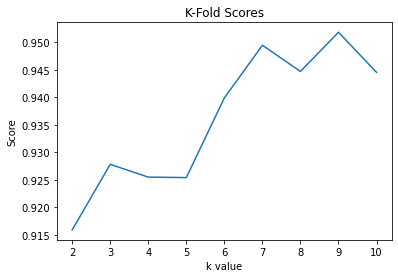

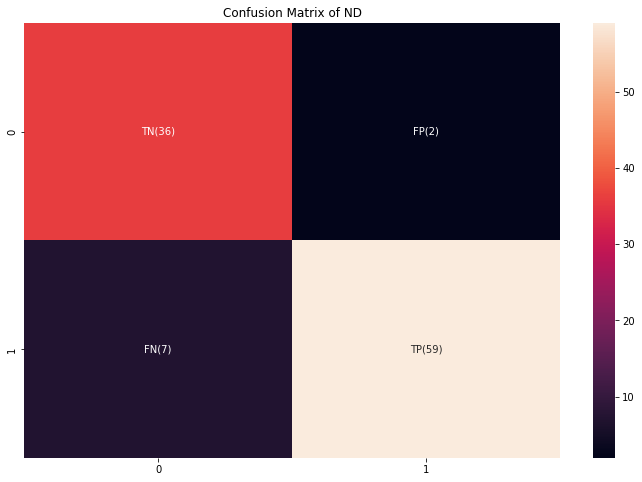

In [159]:
# PREDICTION WITH ORIGINAL DATASET STEP

# Prediction for OD
optimized_prediction(knn, x_train_df, Y_train_df, x_test_df, Y_test_df, isNormalized=False, isClustered=False,
                     message="OD")
# Prediction for ND
optimized_prediction(normalized_knn, x_train_normalized_df, Y_train_normalized_df, x_test_normalized_df,
                     Y_test_normalized_df, isNormalized=True, isClustered=False, message="ND")

Best k value for CV : 2 - Score : 1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Best k value for KNN: {'n_neighbors': 3}
Accuracy for our clustered original training dataset with tuning is : 100.00%
Accuracy for our clustered original testing dataset with tuning is : 99.04%
Precision score: 100.00%
Recall score: 98.31%


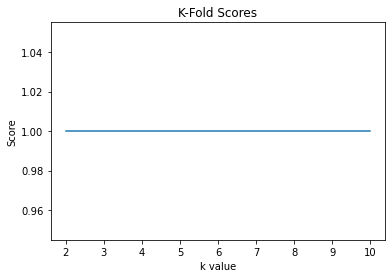

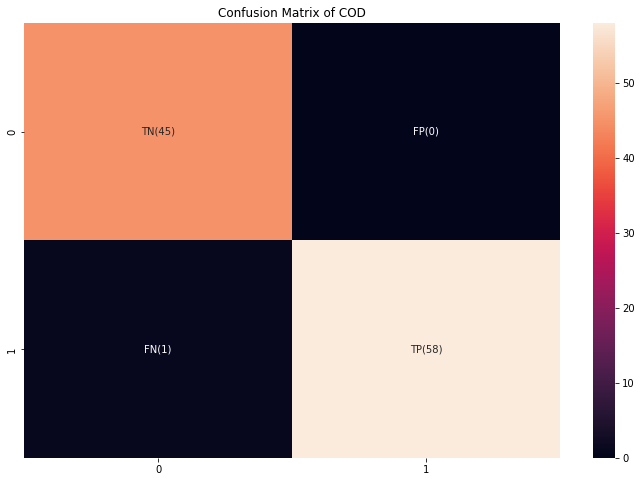

Best k value for CV : 9 - Score : 0.9688046047898039
[0.9663461538461539, 0.9639766447711396, 0.9591346153846154, 0.9663798049340218, 0.9664251207729468, 0.9663841807909604, 0.96875, 0.9688046047898039, 0.9665505226480835]
Best k value for KNN: {'n_neighbors': 3}
Accuracy for our clustered normalized training dataset with tuning is : 96.88%
Accuracy for our clustered normalized testing dataset with tuning is : 94.23%
Precision score: 92.16%
Recall score: 95.92%


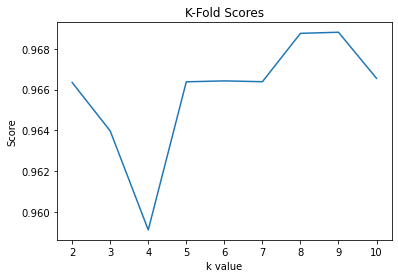

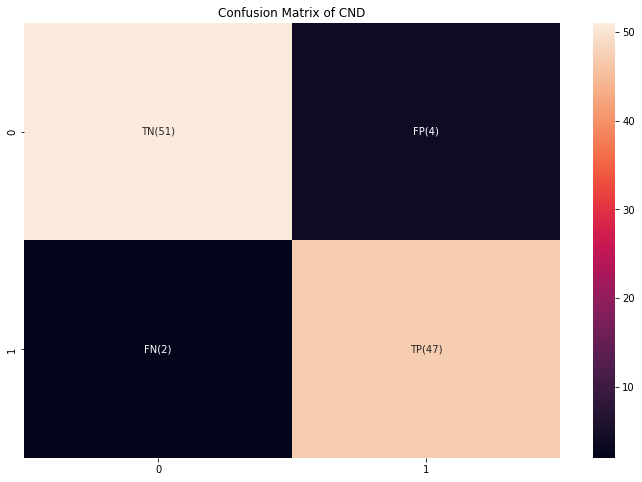

In [160]:
# PREDICTION WITH CLUSTERED DATASET STEP

# Prediction for COD
optimized_prediction(clustered_knn, x_train_clustered_df, Y_train_clustered_df, x_test_clustered_df,
                     Y_test_clustered_df, isNormalized=False, isClustered=True, message="COD")
# Prediction for CND
optimized_prediction(clustered_normalized_knn, x_train_clustered_normalized_df, Y_train_clustered_normalized_df,
                     x_test_clustered_normalized_df, Y_test_clustered_normalized_df, isNormalized=True,
                     isClustered=True, message="CND")

#### Commenting about the models were made in detail in the report.